# Perceptron Classification on Raisin Dataset

This notebook implements a **Perceptron from scratch and applies it to the raisin dataset for binary classification.

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

## 2. Define the Perceptron Class
This implementation mimics how the perceptron updates weights based on prediction errors using stochastic gradient descent.

- `__init__`: Initializes the model variables and parameters.
- `sign`: Applies a linear classifier threshold (returns +1 or -1).
- `loss`: Computes the prediction error (loss function).
- `grad_approx`: Approximates the gradient for updating weights.
- `update_w`: Performs a single step of weight update using stochastic gradient descent.
- `fit`: Trains the model using repeated updates.
- `prediction`: Makes predictions on new data.

In [22]:
class Perceptron():
    def __init__(self):
        self.X = None
        self.y = None
        self.weights = None
        self.weights_history = []
        self.loss_history = [np.inf]
        self.bias = True
        self.gamma = 0.01
        self.max_iter = 1000

    def sign(self, x, y):
        return 1 if x @ y > 0 else -1

    def loss(self):
        return sum(0.5 * (self.sign(self.weights, x) - self.y[i]) ** 2 for i, x in enumerate(self.X))

    def grad_approx(self, x, y):
        return (self.sign(self.weights, x) - y) * x

    def update_w(self, id):
        self.weights = self.weights - self.gamma * self.grad_approx(self.X[id], self.y[id])
        self.weights_history.append(self.weights)

    def fit(self, X, y, bias=True, gamma=0.01, max_iter=1000):
        self.bias = bias
        self.gamma = gamma
        self.max_iter = max_iter

        X = X.to_numpy()
        y = y.to_numpy()
        if bias:
            ones_column = np.ones((X.shape[0], 1))
            X = np.append(ones_column, X, axis=1)

        self.X = X
        self.y = y
        self.weights = np.random.rand(X.shape[1])
        self.weights_history.append(self.weights)

        for i in range(1, max_iter + 1):
            random_id = np.random.randint(len(X))
            self.update_w(random_id)
            L = self.loss()
            self.loss_history.append(L)

    def prediction(self, X, weights):
        X = X.to_numpy()
        if self.bias:
            ones_column = np.ones((X.shape[0], 1))
            X = np.append(ones_column, X, axis=1)
        return [self.sign(x, weights) for x in X]

## 3. Load and Process Data


In [56]:
df = pd.read_csv("/Users/tatianagong/Documents/Gong-CMOR-438-Spring-2025/Supervised Learning/1. The Perceptron/Raisin_Dataset.csv")
df['Class'] = df['Class'].map({'Kecimen': 1, 'Besni': -1})

X = df.drop(columns=['Class'])
y = df['Class']
display(X)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251
...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548


Let's visualize the data to see what two fetures can be used for linear separation.

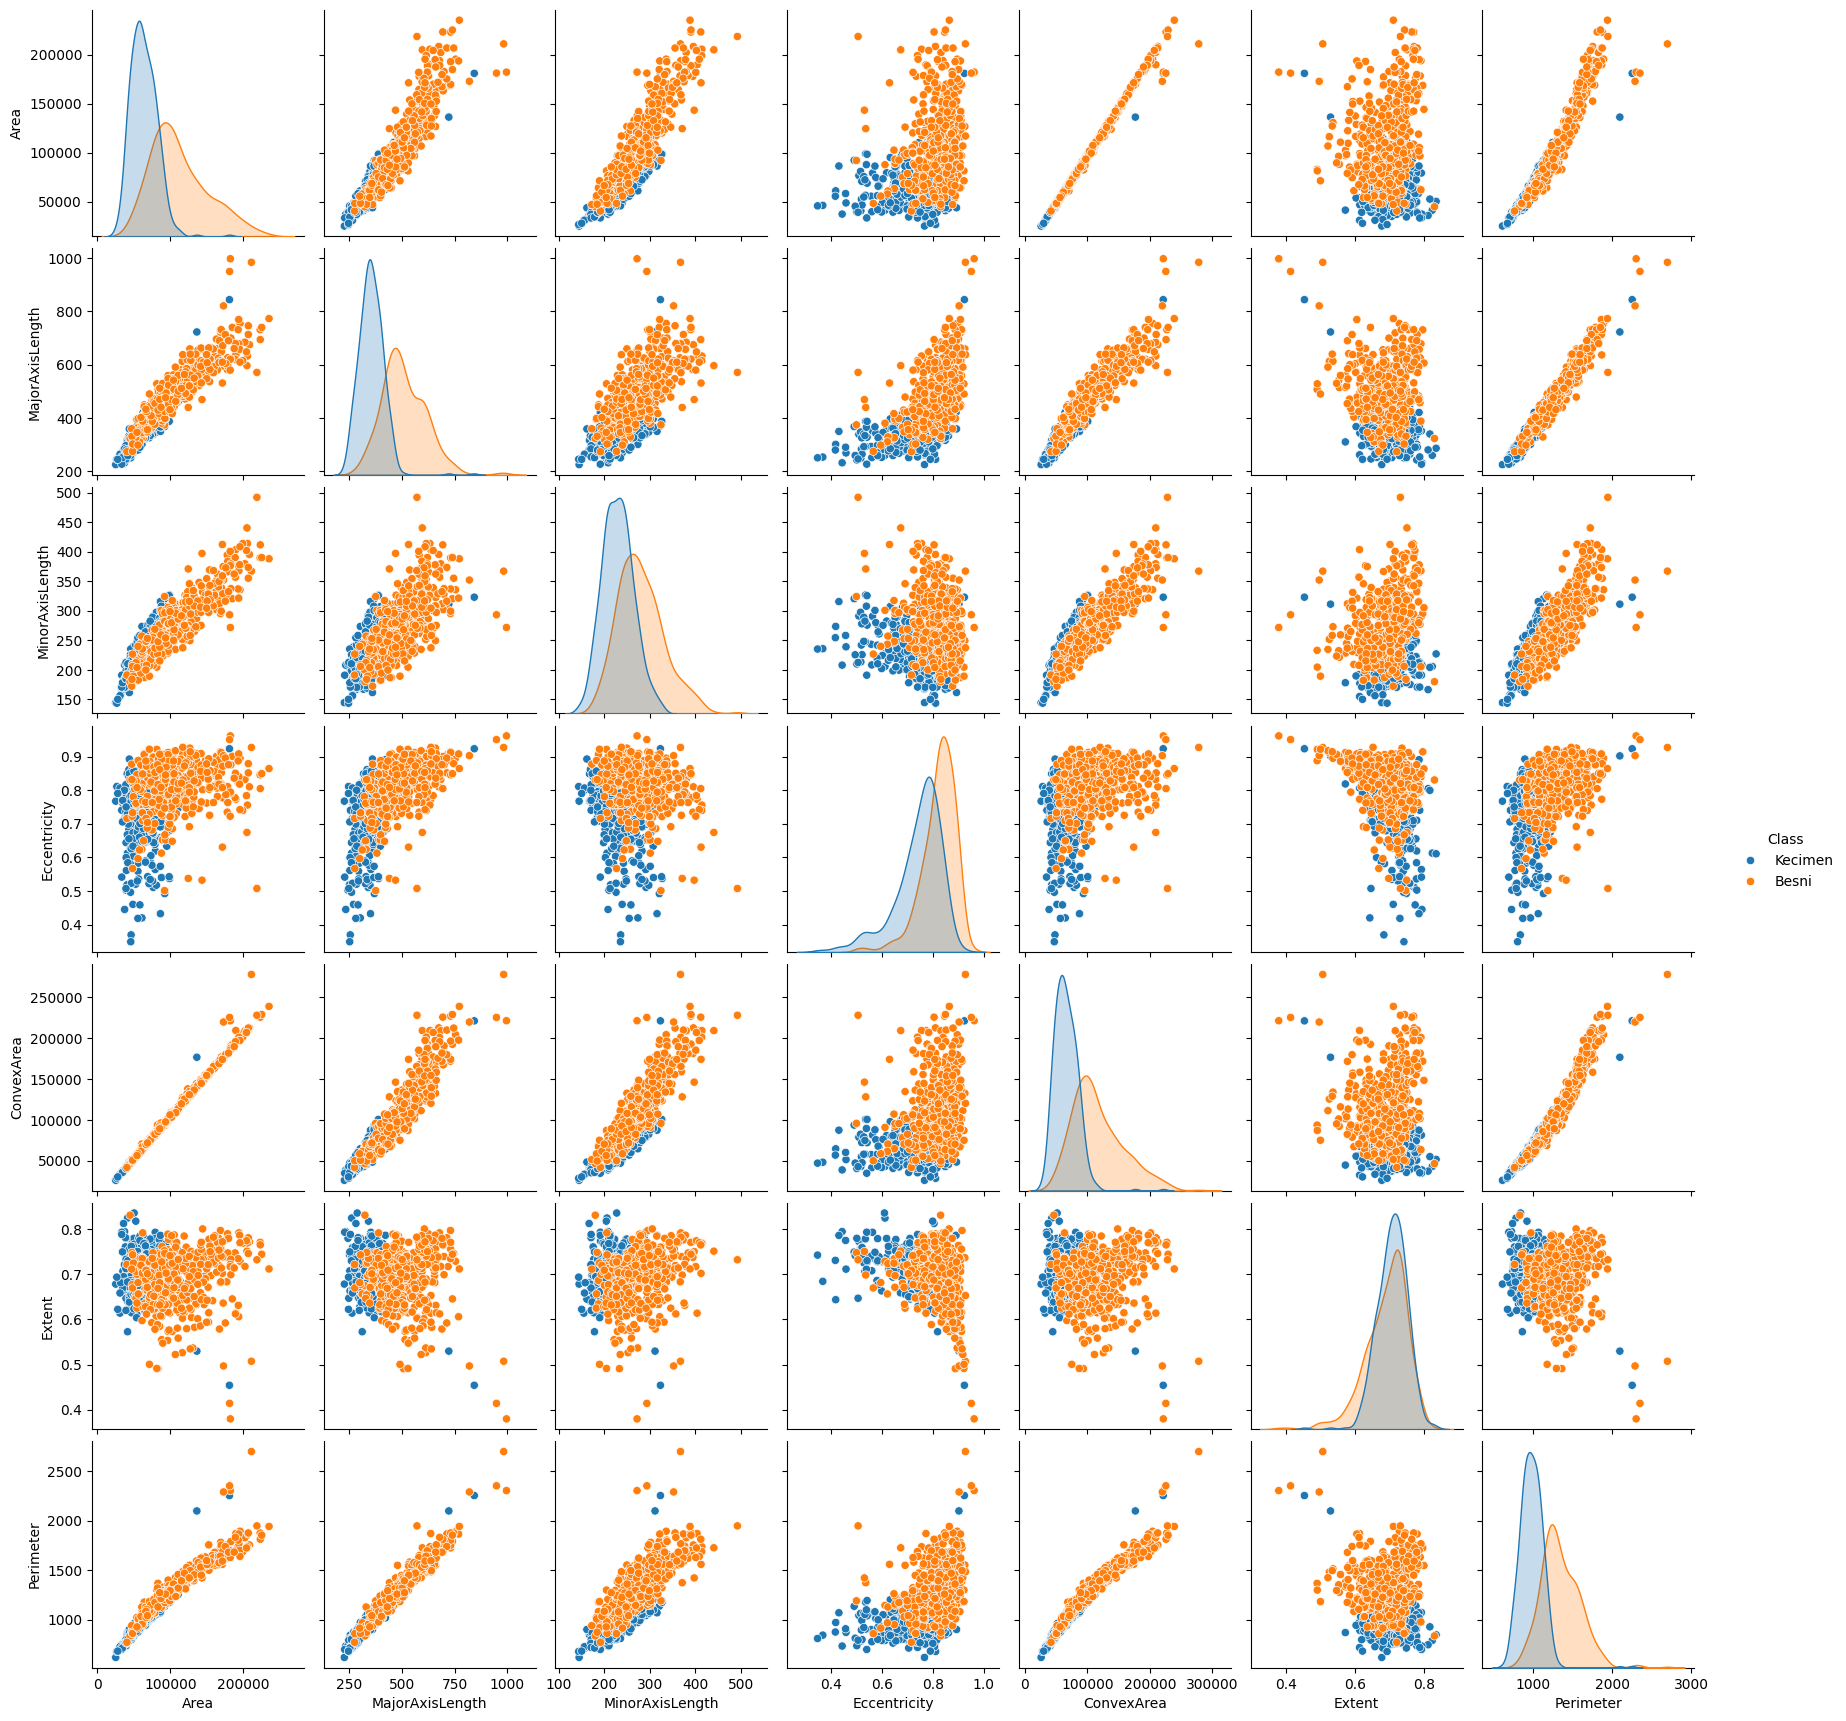

In [59]:
df_plot = df.copy()
df_plot['Class'] = df_plot['Class'].map({1: 'Kecimen', -1: 'Besni'})
sns.pairplot(df_plot, hue='Class')

Looking at the data, let us choose eccentricity vs minor axis length as our two features. They seem relatively separable.

## 4. Feature Scaling
To help the Perceptron converge more efficiently, we standardize the eccentricity and minor axis length.

In [63]:
X = df[['MinorAxisLength', 'Eccentricity']]
y = df['Class']
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)


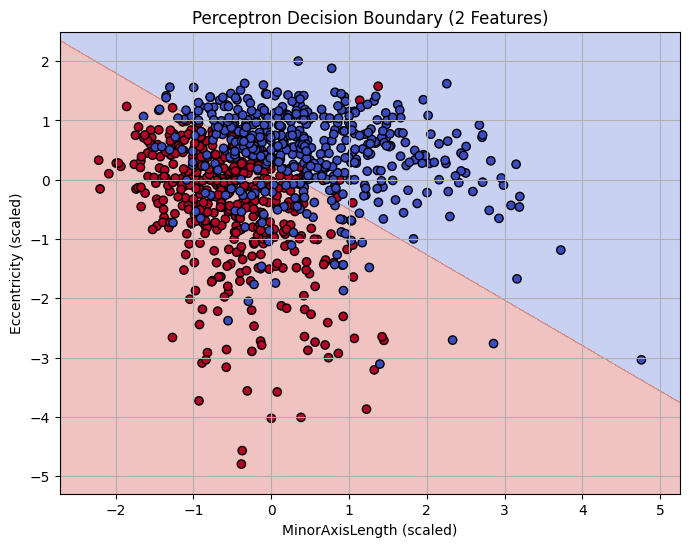

In [91]:
# Create a mesh grid
h = 0.01  # step size in the mesh
x_min, x_max = X_scaled.iloc[:, 0].min() - 0.5, X_scaled.iloc[:, 0].max() + 0.5
y_min, y_max = X_scaled.iloc[:, 1].min() - 0.5, X_scaled.iloc[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Flatten the grid and predict class for each point
grid = np.c_[xx.ravel(), yy.ravel()]
grid_df = pd.DataFrame(grid, columns=['MinorAxisLength', 'Eccentricity'])
Z = model.prediction(grid_df, model.weights)
Z = np.array(Z).reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)

# Scatter the training data
plt.scatter(X_scaled.iloc[:, 0], X_scaled.iloc[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('MinorAxisLength (scaled)')
plt.ylabel('Eccentricity (scaled)')
plt.title('Perceptron Decision Boundary (2 Features)')
plt.grid(True)
plt.show()


## 6. Train the Perceptron

In [88]:
model = Perceptron()
model.fit(X_train, y_train, gamma=0.002, max_iter=1000)

## 7. Plot Training Loss
We visualize how the loss decreases over the training iterations.

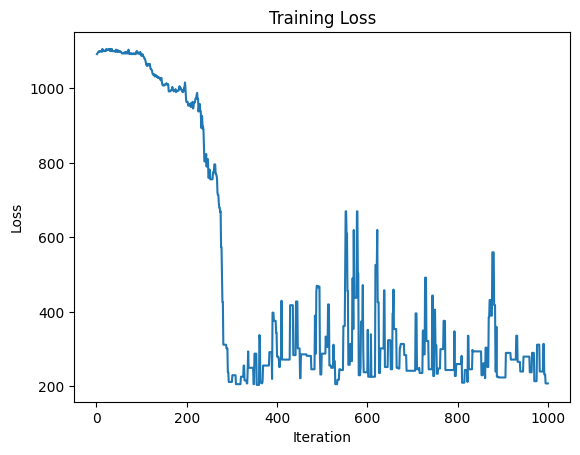

In [89]:
plt.plot(model.loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

## 8. Evaluate Model
We predict on both training and test data and compute accuracy scores.

In [90]:
train_pred = model.prediction(X_train, model.weights)
test_pred = model.prediction(X_test, model.weights)

print("Training Accuracy:", accuracy_score(y_train, train_pred))
print("Testing Accuracy:", accuracy_score(y_test, test_pred))

Training Accuracy: 0.845925925925926
Testing Accuracy: 0.8711111111111111
